In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import config
from utils.io import load_pickle
from utils.torch.datasets import PathologicalImagesDataset, PathologicalImagesDatasetMode

# Load dataset

In [5]:
mode = PathologicalImagesDatasetMode.Val
base_dir = config.DATASET_TRAIN_DIR

In [6]:
dataset = PathologicalImagesDataset(base_dir, mode=mode)

In [7]:
images = [dataset[i][0] for i in range(len(dataset))]
masks = [dataset[i][1] for i in range(len(dataset))]

In [8]:
images = np.stack(images)
masks = np.stack(masks)

In [9]:
images.shape, masks.shape

((34, 500, 500, 3), (34, 500, 500))

# Load predictions 

In [10]:
predictions_filename = config.PREDICTIONS_DIR.joinpath(f'FCN32_224_480_val.pkl')
images_filename, predictions = load_pickle(predictions_filename)

In [11]:
predictions.shape

(34, 500, 500)

In [12]:
predictions_mask = np.zeros_like(predictions)
predictions_mask[predictions>0.5] = 1

# Plot predictions

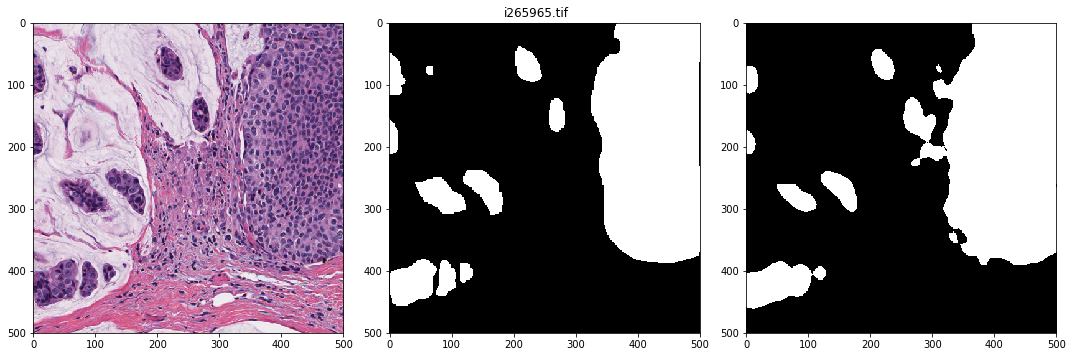

In [14]:
i = 1

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(images[i])
ax2.imshow(masks[i], cmap='gray')
ax3.imshow(predictions_mask[i], cmap='gray')

fig.suptitle(images_filename[i].name)

fig.tight_layout()